# Welcome to my notebook..

Geospatial Clustering Notebook sample :) 

In [1]:
import numpy as np
import pandas as pd

Let's retrieve OpenStreetMap (OSM)Data by specifying the places for data to be downloaded.

In [2]:
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

# Specify the name that is used to seach for the data
place_name = "Mumbai, Maharashtra, India"

# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)
type(graph)

networkx.classes.multidigraph.MultiDiGraph

Wooh !! We found something new. A new DataFormat Multidigraph. So,A DiGraph is a data type that stores nodes and edges with optional data, or attributes. What we can see here is that this data type belongs to a Python module called networkx that can be used to create, manipulate, and study the structure, dynamics, and functions of complex networks. Networkx module contains algorithms that can be used to calculate shortest paths along road networks also.

     Let's look at streets of Mumbai now..

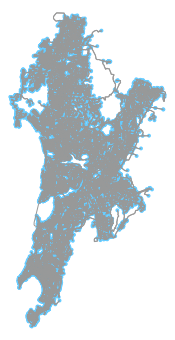

In [3]:
# Plot the streets
fig, ax = ox.plot_graph(graph)

Woahh !! Now there exists nodes (blue circles)in the graph and the edges (gray lines) that connects those nodes to each other.

It is also possible to retrieve other types of OSM data features with osmnx such as buildings or points of interest (POIs).

Cool, now let's download and see the buildings in Mumbai..

In [4]:
# Retrieve the footprint of our location
area = ox.gdf_from_place(place_name)

# Retrieve buildings from the area
buildings = ox.footprints_from_place(place_name)

# What types are those?
print(type(area))
print(type(buildings))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


Great !! Now, we have GeoDataFrame and OSmnx comes up with a surprise. We can extract the POI Data from openstreetmap using overpy by using a simple function of OSmnx i.e.pois_from_place. Let's do it !!

In [5]:
#Retrieve restaurants, cafe, ...etc.
restaurants = ox.pois_from_place(place_name, amenities=['restaurant'])
cafe = ox.pois_from_place(place_name, amenities=['cafe'])
drinking_water = ox.pois_from_place(place_name, amenities=['drinking_water'])
food_court = ox.pois_from_place(place_name, amenities=['food_court'])
college = ox.pois_from_place(place_name, amenities=['college'])
university = ox.pois_from_place(place_name, amenities=['university'])
bus_station = ox.pois_from_place(place_name, amenities=['bus_station'])
parking = ox.pois_from_place(place_name, amenities=['parking'])
bank = ox.pois_from_place(place_name, amenities=['bank'])
hospital = ox.pois_from_place(place_name, amenities=['hospital'])
cinema = ox.pois_from_place(place_name, amenities=['cinema'])
community_centre = ox.pois_from_place(place_name, amenities=['community_centre'])
bench = ox.pois_from_place(place_name, amenities=['bench'])
marketplace = ox.pois_from_place(place_name, amenities=['marketplace'])
toilets = ox.pois_from_place(place_name, amenities=['toilets'])
kindergarten = ox.pois_from_place(place_name, amenities=['kindergarten'])

In [6]:
# How many restaurants do we have?
len(restaurants)

487

WOW , NEVER Mind I am not going to use it. I just wanted to know this :).. Lets' move ahead guys
    Now , I am just going to join the dataframes into one wih different labels for amenities so that I could Cluster them Later. I am performing Univariate Clustering only..

In [7]:
# Concatenating the geodataframes
df=pd.concat([restaurants,cafe,drinking_water,food_court,college,university,bus_station,parking,bank,hospital,cinema,community_centre,bench,marketplace,toilets,kindergarten],sort=True)

In [8]:
df.head()

,AND_a_nosr_p,Guard_type,access,addr:city,addr:country,addr:housename,addr:housenumber,addr:neighbourhood,addr:place,addr:postcode,...,unisex,url,visibility,ways,website,wheelchair,wifi,wikidata,wikipedia,wpt_symbol
245653876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347145411,NaN,NaN,NaN,Mumbai,NaN,NaN,NaN,NaN,NaN,400050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347168982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347168988,NaN,NaN,NaN,Mumbai,NaN,NaN,NaN,NaN,NaN,400050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
459667350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Available columns
df.columns

Index(['AND_a_nosr_p', 'Guard_type', 'access', 'addr:city', 'addr:country',
       'addr:housename', 'addr:housenumber', 'addr:neighbourhood',
       'addr:place', 'addr:postcode',
       ...
       'unisex', 'url', 'visibility', 'ways', 'website', 'wheelchair', 'wifi',
       'wikidata', 'wikipedia', 'wpt_symbol'],
      dtype='object', length=131)

In [10]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)
print("Nodes:\n", nodes.head(), '\n')
print("Edges:\n", edges.head(), '\n')
print("Type:", type(edges))

Nodes:
            highway       osmid          x          y  \
2248802304     NaN  2248802304  72.933472  19.054356   
2248802313     NaN  2248802313  72.937489  19.054384   
6136332304     NaN  6136332304  72.872799  19.017702   
1351352338     NaN  1351352338  72.844702  19.224646   
2248802324     NaN  2248802324  72.924349  19.054576   

                             geometry  
2248802304  POINT (72.93347 19.05436)  
2248802313  POINT (72.93749 19.05438)  
6136332304  POINT (72.87280 19.01770)  
1351352338  POINT (72.84470 19.22465)  
2248802324  POINT (72.92435 19.05458)   

Edges:
   access bridge                                           geometry  \
0    NaN    NaN  LINESTRING (72.93347 19.05436, 72.93290 19.05463)   
1    NaN    NaN  LINESTRING (72.93749 19.05438, 72.93815 19.054...   
2    NaN    NaN  LINESTRING (72.87280 19.01770, 72.87138 19.017...   
3    NaN    NaN  LINESTRING (72.84470 19.22465, 72.84472 19.22394)   
4    NaN    NaN  LINESTRING (72.84470 19.22465, 72.8447

Here's a thing, I want to know how the individual amenities are ditributed over Mumbai before I cluster them into commercial centres..

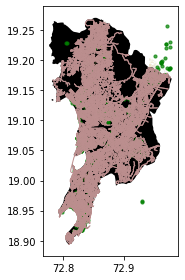

In [11]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='green', alpha=0.7, markersize=10)
plt.tight_layout()

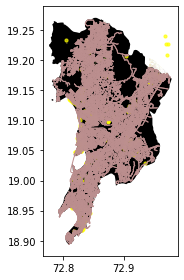

In [12]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot cafe
cafe.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

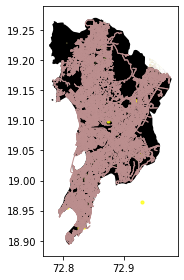

In [13]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot drinking_water
drinking_water.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

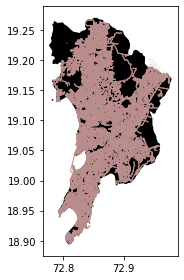

In [14]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot food court
food_court.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

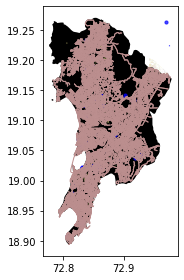

In [15]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot colleges
college.plot(ax=ax, color='blue', alpha=0.7, markersize=10)
plt.tight_layout()

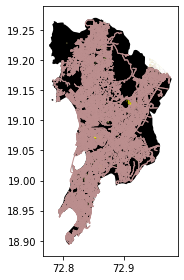

In [16]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot universities
university.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

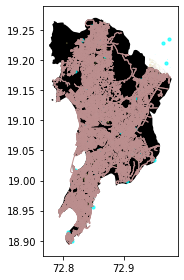

In [17]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot bus stations
bus_station.plot(ax=ax, color='cyan', alpha=0.7, markersize=10)
plt.tight_layout()

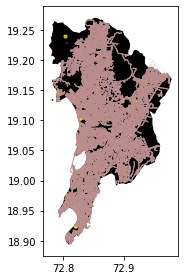

In [18]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot parking
parking.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

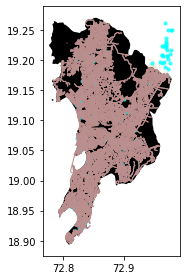

In [19]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot bank
bank.plot(ax=ax, color='cyan', alpha=0.7, markersize=10)
plt.tight_layout()

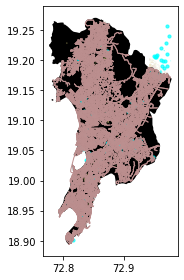

In [20]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot hospital
hospital.plot(ax=ax, color='cyan', alpha=0.7, markersize=10)
plt.tight_layout()

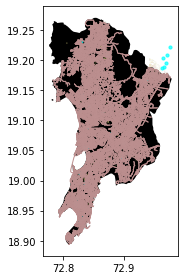

In [21]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot cinema
cinema.plot(ax=ax, color='cyan', alpha=0.7, markersize=10)
plt.tight_layout()

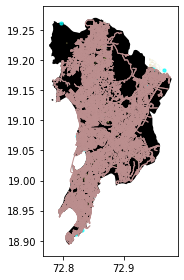

In [22]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot community centre
community_centre.plot(ax=ax, color='cyan', alpha=0.7, markersize=10)
plt.tight_layout()

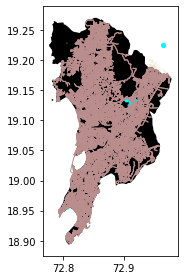

In [23]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot bench
bench.plot(ax=ax, color='cyan', alpha=0.7, markersize=10)
plt.tight_layout()

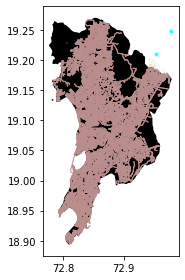

In [24]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot marketplace
marketplace.plot(ax=ax, color='cyan', alpha=0.7, markersize=10)
plt.tight_layout()

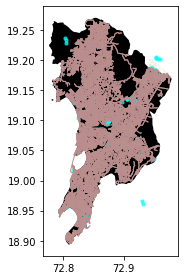

In [25]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot toilets
toilets.plot(ax=ax, color='cyan', alpha=0.7, markersize=10)
plt.tight_layout()

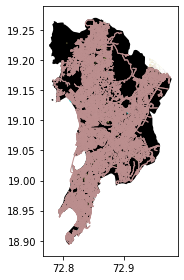

In [26]:
# Plot the footprint
ax = area.plot(facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Plot kindergarten
kindergarten.plot(ax=ax, color='cyan', alpha=0.7, markersize=10)
plt.tight_layout()

Whooossh, this is a whole lot of data to move around. Let's reduce it and consider only primary features for instance.

In [27]:
# Select some useful cols and print
cols = ['name', 'opening_hours', 'addr:city', 'amenity','geometry', 
        'addr:housenumber', 'addr:postcode', 'addr:street']

In [28]:
# Print and take only this data columns
df1=df[cols]

We have data for different 'amenities' but they are in label form and before clustering it we need to Labelencode them

In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [30]:
df1.columns.get_loc("geometry")

4

In [31]:
df1.columns.get_loc("amenity")

3

In [32]:
labelencoder = LabelEncoder()

Need to convert categorical data into string format

In [33]:
categorical = list(df1.select_dtypes(include=['object']).columns.values)
for cat in categorical:
    print(cat)
    df1[cat].fillna('X', inplace=True)
    #df1[cat] = labelencoder.fit_transform(df1[cat])
    df1[cat] = labelencoder.fit_transform(df1[cat].astype(str))
#     print(le.classes_)
#     print(le.transform(le.classes_))

name


D:\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


opening_hours
addr:city
amenity
addr:housenumber
addr:postcode
addr:street


Okay, now we have the LabelEncoded Data. Focus on amenity and Geometry only as of now..

In [34]:
df1.head()

,name,opening_hours,addr:city,amenity,geometry,addr:housenumber,addr:postcode,addr:street
245653876,216,69,12,20,POINT (72.83257 18.92757),76,65,233
347145411,334,26,7,20,POINT (72.82408 19.05176),76,27,106
347168982,871,69,12,20,POINT (72.82580 19.05487),76,65,233
347168988,1042,69,7,20,POINT (72.82589 19.05487),76,27,233
459667350,442,69,12,20,POINT (72.79767 18.95407),76,65,233


# Clustering using geopandas

In [35]:
%matplotlib inline
import pandas as pd
import geopandas

pd.options.display.max_rows=10

# Agglomerative Clustering

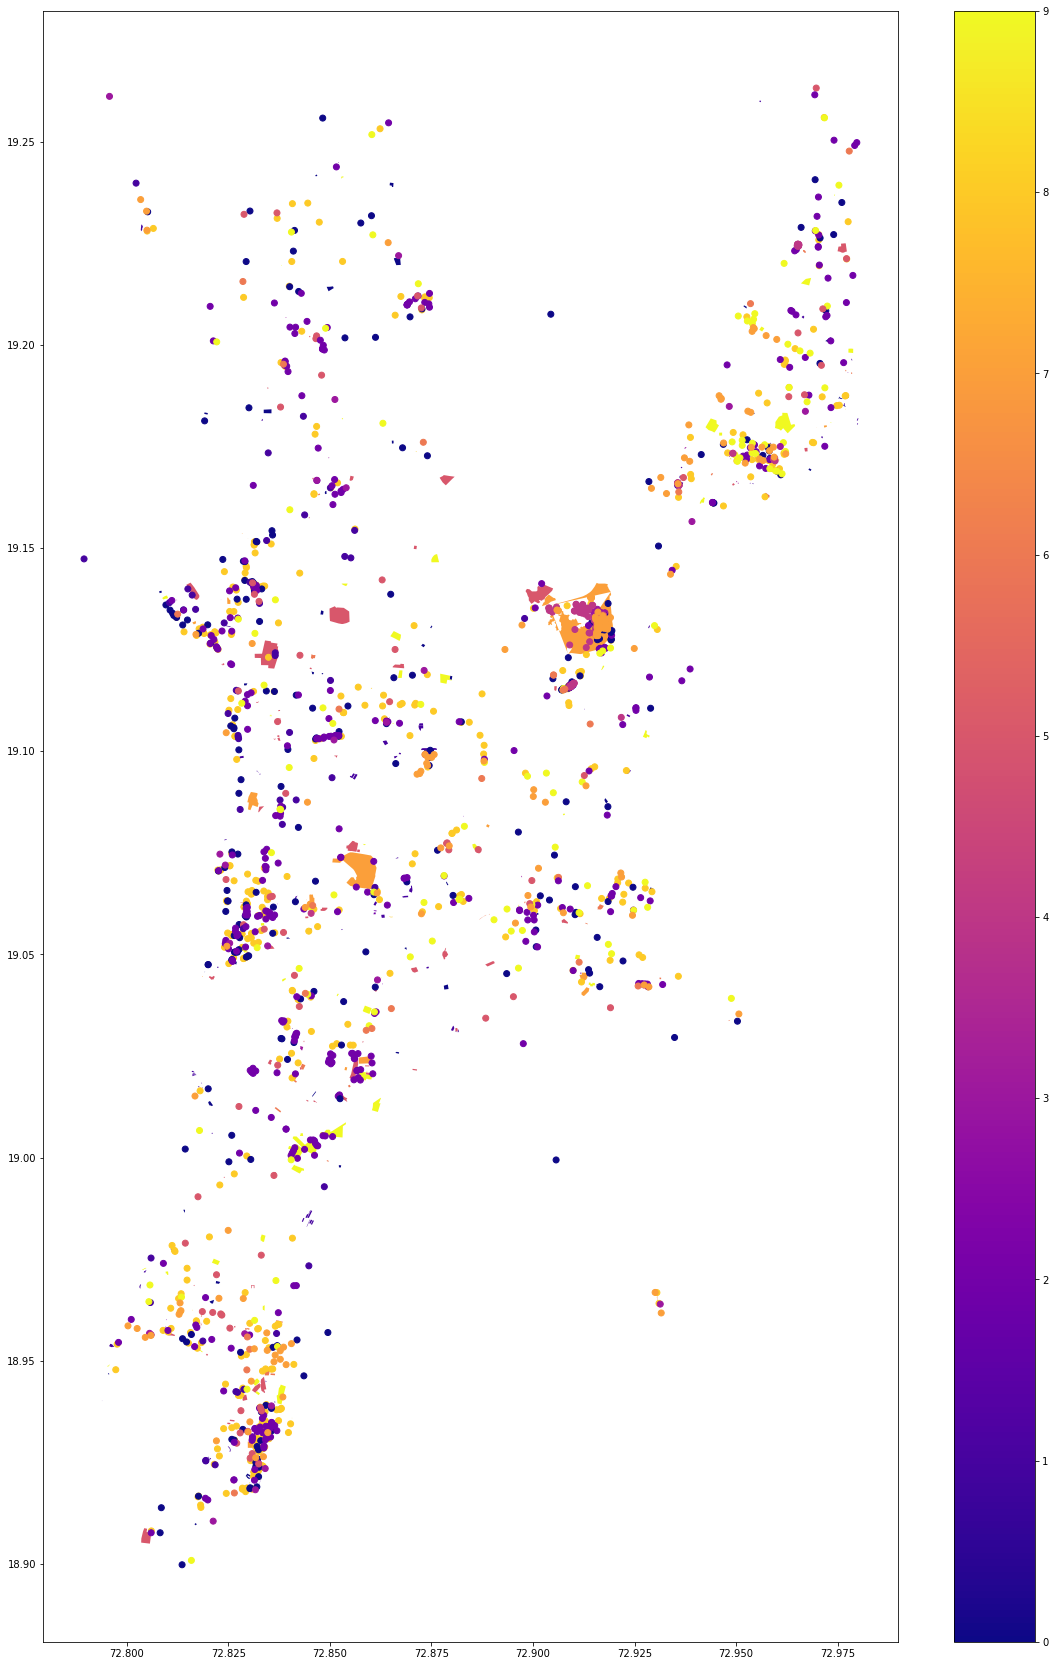

In [36]:
# import sklearn.cluster as skc
from sklearn.cluster import AgglomerativeClustering
place_clusters = AgglomerativeClustering(n_clusters=10).fit(df1['amenity'].values.reshape(-1,1))
df1.assign(labels=place_clusters.labels_).plot('labels', cmap='plasma', figsize=(20, 30), legend=True)

# K Means Clustering

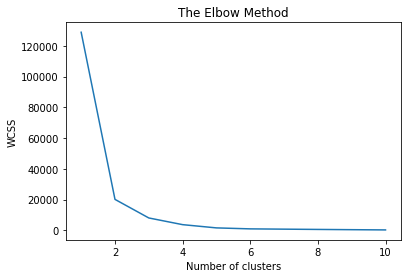

In [54]:
# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(df1['amenity'].values.reshape(-1,1))
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

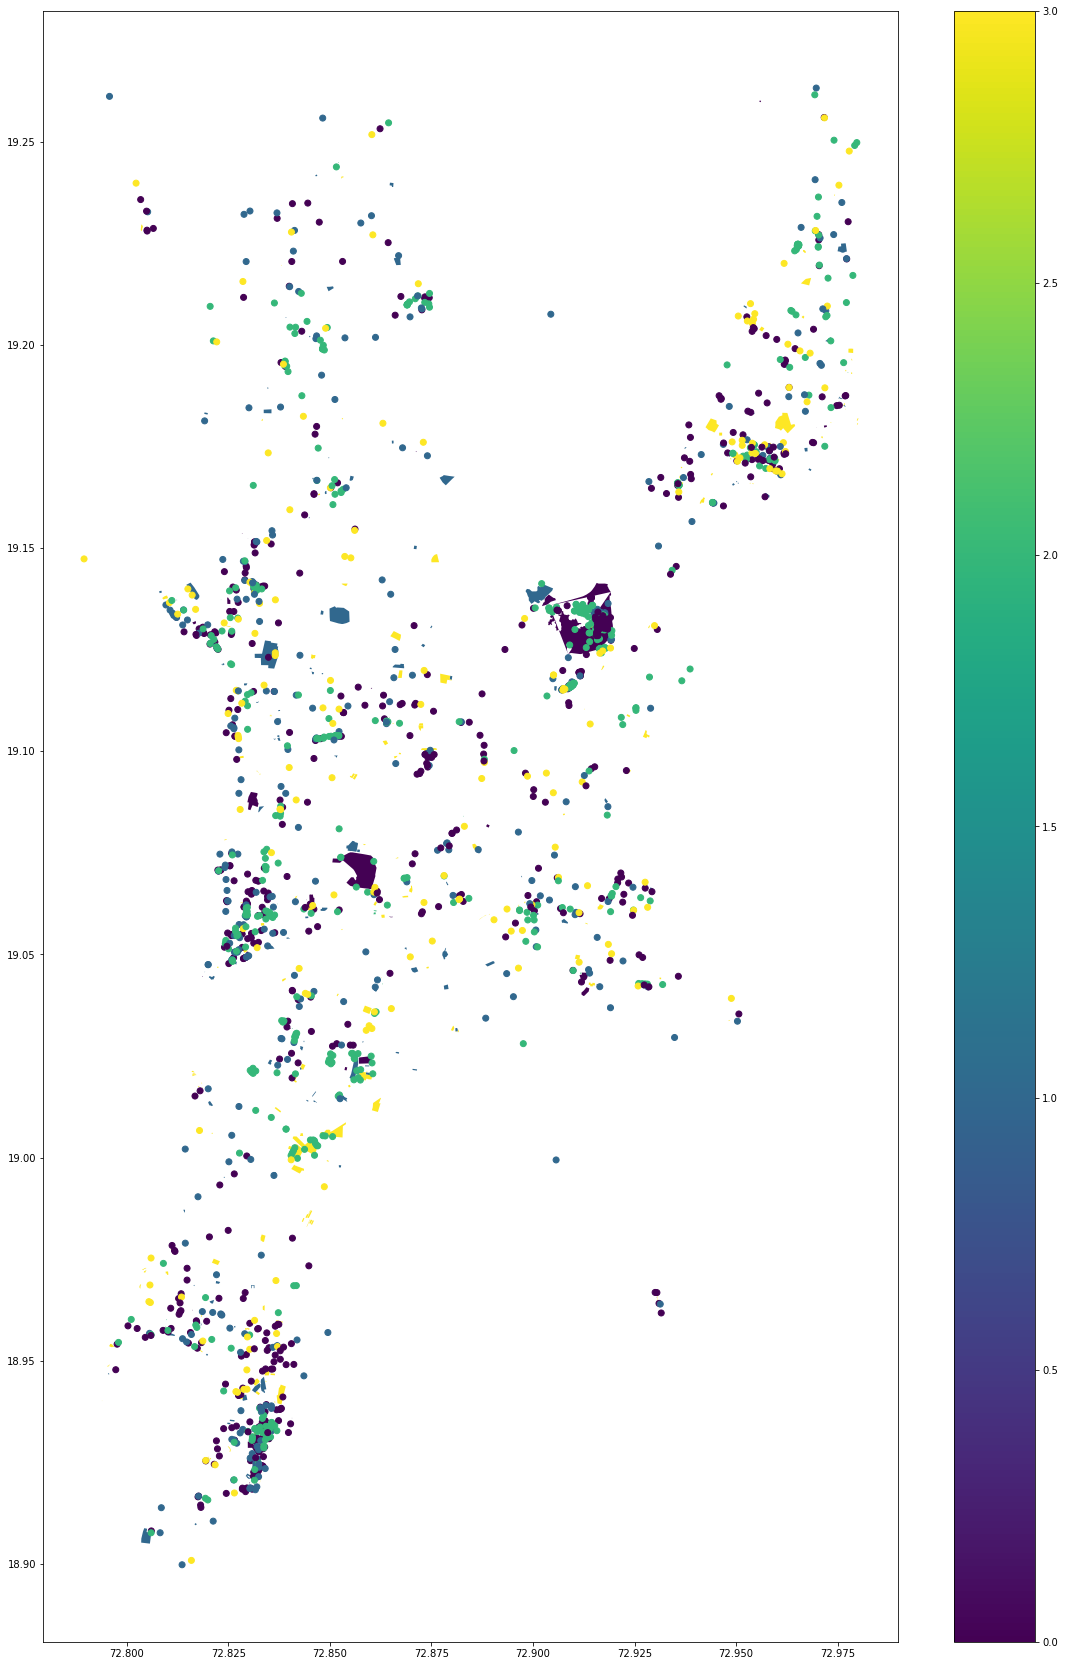

In [55]:
from sklearn.cluster import KMeans 
place_clusters2 = KMeans(n_clusters=4).fit(df1['amenity'].values.reshape(-1,1))
df1.assign(labels=place_clusters2.labels_).plot('labels', cmap='viridis', figsize=(20, 30), legend=True)

In [38]:
place_clusters2.score

<bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)>

In [39]:
place_clusters2.cluster_centers_

array([[19.99795082],
       [ 6.65263158],
       [ 0.83969466],
       [11.        ],
       [16.06711409],
       [ 4.63957597],
       [21.09039548],
       [13.8       ],
       [ 8.52054795],
       [ 2.13380282]])

In [40]:
place_clusters2.labels_

array([0, 0, 0, ..., 7, 7, 7])

In [41]:
cluster = place_clusters2.labels_

In [42]:
cluster

array([0, 0, 0, ..., 7, 7, 7])

In [43]:
df1['cluster'] = cluster

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
df1

,name,opening_hours,addr:city,amenity,geometry,addr:housenumber,addr:postcode,addr:street,cluster
245653876,216,69,12,20,POINT (72.83257 18.92757),76,65,233,0
347145411,334,26,7,20,POINT (72.82408 19.05176),76,27,106,0
347168982,871,69,12,20,POINT (72.82580 19.05487),76,65,233,0
347168988,1042,69,7,20,POINT (72.82589 19.05487),76,27,233,0
459667350,442,69,12,20,POINT (72.79767 18.95407),76,65,233,0
...,...,...,...,...,...,...,...,...,...
6795476404,1045,69,12,13,POINT (72.90741 19.11504),76,65,35,7
289852231,198,69,12,13,"POLYGON ((72.93118 19.04433, 72.93156 19.04421...",76,65,233,7
345159713,1063,69,15,13,"POLYGON ((72.88712 19.09329, 72.88721 19.09342...",76,0,8,7
347008802,1108,69,12,13,"POLYGON ((72.88913 19.05988, 72.88923 19.05978...",76,65,235,7


In [45]:
clafrica = pd.DataFrame(df1)

In [46]:
cluster_1 = clafrica.loc[df1['cluster']== 1]

In [47]:
cluster_1.name

347036704    884
347137895    637
347138192    545
348128686    763
456160323    640
            ... 
275865018    681
354016269    210
358298887    583
632245751    588
681516924     70
Name: name, Length: 190, dtype: int32

In [48]:
clafrica.name

245653876      216
347145411      334
347168982      871
347168988     1042
459667350      442
              ... 
6795476404    1045
289852231      198
345159713     1063
347008802     1108
665670032      746
Name: name, Length: 2135, dtype: int32

In [49]:
###########################